In [1]:
#Load Packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt
# Load Text Cleaning Pkgs
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost.sklearn import XGBClassifier

In [2]:
# DL lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

print("Keras Version : {}". format(keras.__version__))

Keras Version : 2.10.0


# Load dataset

In [3]:
 
df = pd.read_csv('final_labels_MBIC.csv', sep = ";")

In [4]:
df

text  \
0     YouTube is making clear there will be no “birt...   
1     So while there may be a humanitarian crisis dr...   
2     Looking around the United States, there is nev...   
3     The Republican president assumed he was helpin...   
4     The explosion of the Hispanic population has l...   
...                                                 ...   
1695  Last week, Barstool Sports founder Dave Portno...   
1696  Coincidentally, many Republican lawmakers who ...   
1697  Democrats and Republicans stood and applauded ...   
1698  As a self-described Democratic socialist, Sen....   
1699  During the segment, Colbert also bemoaned the ...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1     https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2     https://thefederalist.com/2020/03/11/woman-who...  federalist   
3     http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4     https://www.breitbart.com/politics/2015/02/26/...   breitbart   
...                                                 ...         ...   
1695  https://thefederalist.com/2020/05/18/how-you-c...  federalist   
1696  https://www.alternet.org/2020/01/follow-the-mo...    alternet   
1697  https://eu.usatoday.com/story/news/politics/20...   usa-today   
1698  https://www.foxnews.com/politics/how-did-berni...    fox-news   
1699  https://www.breitbart.com/entertainment/2018/1...   breitbart   

                  topic    type  group_id  num_sent  label_bias  \
0        elections-2020  center         1         1      Biased   
1           immigration    left         1         1      Biased   
2              abortion   right         1         1      Biased   
3           environment    left         1         1      Biased   
4          student-debt   right         1         1      Biased   
...                 ...     ...       ...       ...         ...   
1695        coronavirus   right        85         1  Non-biased   
1696       middle-class    left        85         1  Non-biased   
1697             gender  center        85         1  Non-biased   
1698       middle-class   right        85         1  Non-biased   
1699  white-nationalism   right        85         1  Non-biased   

                              label_opinion  \
0     Somewhat factual but also opinionated   
1                Expresses writer’s opinion   
2     Somewhat factual but also opinionated   
3                Expresses writer’s opinion   
4                              No agreement   
...                                     ...   
1695  Somewhat factual but also opinionated   
1696  Somewhat factual but also opinionated   
1697                       Entirely factual   
1698                       Entirely factual   
1699                           No agreement   

                                                article  \
0     YouTube says no ‘deepfakes’ or ‘birther’ video...   
1     Speaking to the country for the first time fro...   
2     The left has a thing for taking babies hostage...   
3     In Barack Obama’s first term, the administrati...   
4     Republicans should stop fighting amnesty, Pres...   
...                                                 ...   
1695  Not everyone seething about the ongoing abuses...   
1696  It’s long been obvious that Republican senator...   
1697                                                NaN   
1698  As a self-described Democratic socialist, Sen....   
1699  CBS Late Show host Stephen Colbert claimed on ...   

                                           biased_words  
0                             ['belated', 'birtherism']  
1                                            ['crisis']  
2     ['killing', 'never', 'developing', 'humans', '...  
3                       ['rejects', 'happy', 'assumed']  
4                                         ['explosion']  
...                                                 ...  
1695

In [5]:
df.shape

(1700, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1700 non-null   object
 1   news_link      1681 non-null   object
 2   outlet         1700 non-null   object
 3   topic          1700 non-null   object
 4   type           1700 non-null   object
 5   group_id       1700 non-null   int64 
 6   num_sent       1700 non-null   int64 
 7   label_bias     1700 non-null   object
 8   label_opinion  1700 non-null   object
 9   article        1595 non-null   object
 10  biased_words   1700 non-null   object
dtypes: int64(2), object(9)
memory usage: 146.2+ KB


<AxesSubplot: xlabel='type', ylabel='count'>

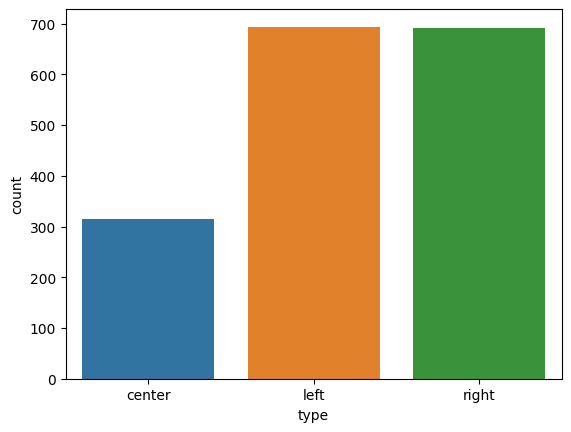

In [7]:
#Distribution
sns.countplot(x="type", data=df)

<AxesSubplot: xlabel='label_bias', ylabel='count'>

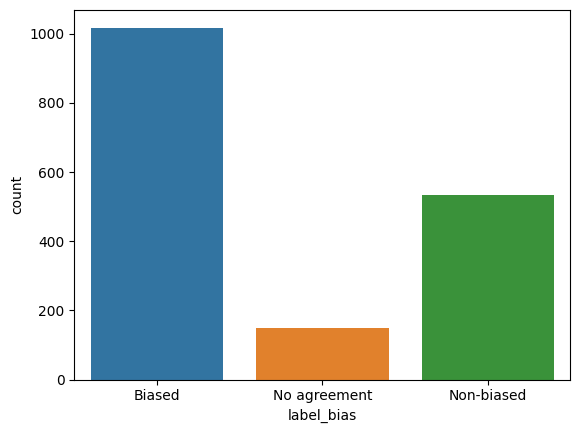

In [8]:
#Distribution
sns.countplot(x="label_bias", data=df)

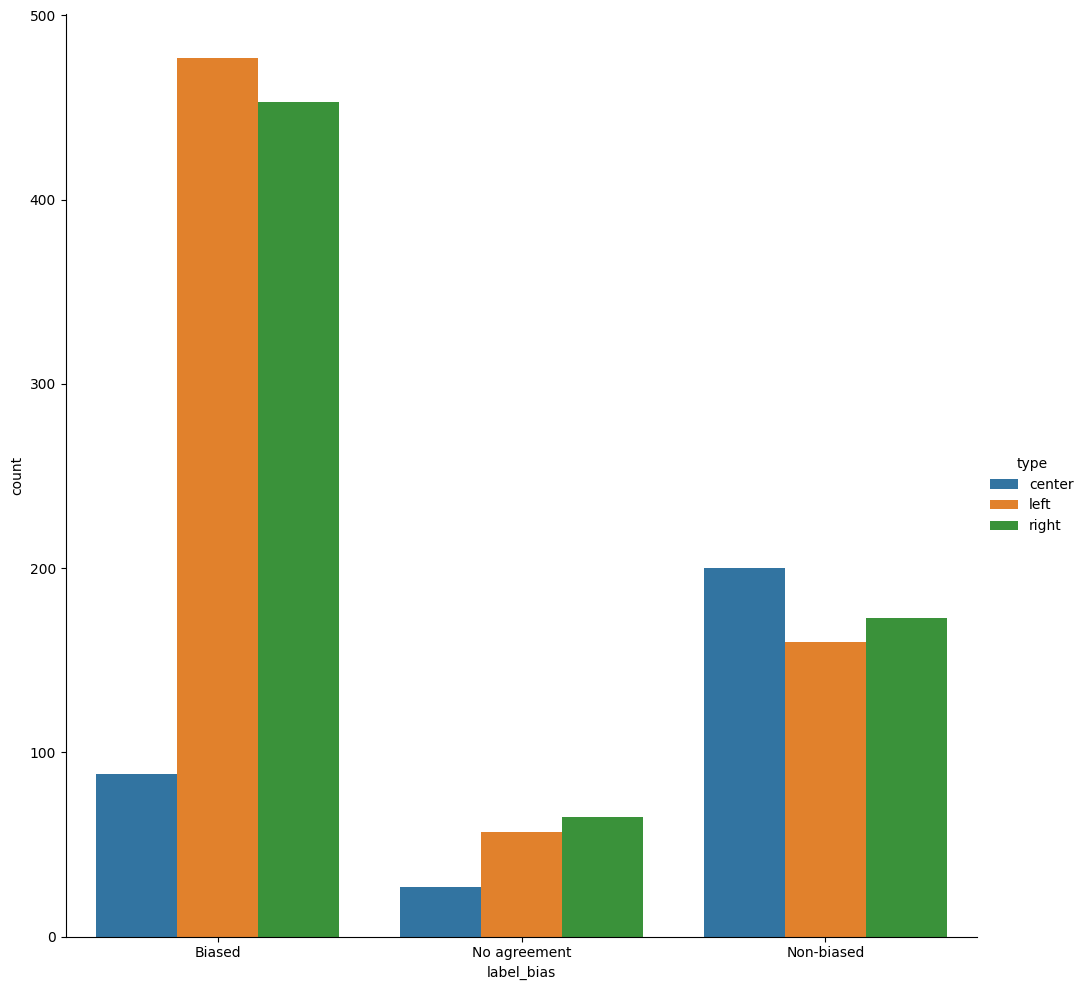

In [9]:
sns.catplot(x="label_bias", hue = "type", kind = "count", data = df, height=10)

In [10]:
# Check the composition or freq of tokens per each type (political spectrum)
# Text Preprocessing
#! pip install neattext

In [11]:
df.isna().sum()

text               0
news_link         19
outlet             0
topic              0
type               0
group_id           0
num_sent           0
label_bias         0
label_opinion      0
article          105
biased_words       0
dtype: int64

In [12]:
df["article"] = df["article"].fillna("unknown")

In [13]:
df.isna().sum()

text              0
news_link        19
outlet            0
topic             0
type              0
group_id          0
num_sent          0
label_bias        0
label_opinion     0
article           0
biased_words      0
dtype: int64

In [14]:
#Combining the two col
df['documents'] = df['text'] + df['article']

In [15]:
df

text  \
0     YouTube is making clear there will be no “birt...   
1     So while there may be a humanitarian crisis dr...   
2     Looking around the United States, there is nev...   
3     The Republican president assumed he was helpin...   
4     The explosion of the Hispanic population has l...   
...                                                 ...   
1695  Last week, Barstool Sports founder Dave Portno...   
1696  Coincidentally, many Republican lawmakers who ...   
1697  Democrats and Republicans stood and applauded ...   
1698  As a self-described Democratic socialist, Sen....   
1699  During the segment, Colbert also bemoaned the ...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1     https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2     https://thefederalist.com/2020/03/11/woman-who...  federalist   
3     http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4     https://www.breitbart.com/politics/2015/02/26/...   breitbart   
...                                                 ...         ...   
1695  https://thefederalist.com/2020/05/18/how-you-c...  federalist   
1696  https://www.alternet.org/2020/01/follow-the-mo...    alternet   
1697  https://eu.usatoday.com/story/news/politics/20...   usa-today   
1698  https://www.foxnews.com/politics/how-did-berni...    fox-news   
1699  https://www.breitbart.com/entertainment/2018/1...   breitbart   

                  topic    type  group_id  num_sent  label_bias  \
0        elections-2020  center         1         1      Biased   
1           immigration    left         1         1      Biased   
2              abortion   right         1         1      Biased   
3           environment    left         1         1      Biased   
4          student-debt   right         1         1      Biased   
...                 ...     ...       ...       ...         ...   
1695        coronavirus   right        85         1  Non-biased   
1696       middle-class    left        85         1  Non-biased   
1697             gender  center        85         1  Non-biased   
1698       middle-class   right        85         1  Non-biased   
1699  white-nationalism   right        85         1  Non-biased   

                              label_opinion  \
0     Somewhat factual but also opinionated   
1                Expresses writer’s opinion   
2     Somewhat factual but also opinionated   
3                Expresses writer’s opinion   
4                              No agreement   
...                                     ...   
1695  Somewhat factual but also opinionated   
1696  Somewhat factual but also opinionated   
1697                       Entirely factual   
1698                       Entirely factual   
1699                           No agreement   

                                                article  \
0     YouTube says no ‘deepfakes’ or ‘birther’ video...   
1     Speaking to the country for the first time fro...   
2     The left has a thing for taking babies hostage...   
3     In Barack Obama’s first term, the administrati...   
4     Republicans should stop fighting amnesty, Pres...   
...                                                 ...   
1695  Not everyone seething about the ongoing abuses...   
1696  It’s long been obvious that Republican senator...   
1697                                            unknown   
1698  As a self-described Democratic socialist, Sen....   
1699  CBS Late Show host Stephen Colbert claimed on ...   

                                           biased_words  \
0                             ['belated', 'birtherism']   
1                                            ['crisis']   
2     ['killing', 'never', 'developing', 'humans', '...   
3                       ['rejects', 'happy', 'assumed']   
4                                         ['explosion']   
...                                                 ... 

In [16]:
# Text Preprocessing
import neattext.functions as nfx 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
df['clean_documents'] = df['documents'].apply(lambda x : nfx.remove_stopwords(x.lower()))

In [18]:
df

text  \
0     YouTube is making clear there will be no “birt...   
1     So while there may be a humanitarian crisis dr...   
2     Looking around the United States, there is nev...   
3     The Republican president assumed he was helpin...   
4     The explosion of the Hispanic population has l...   
...                                                 ...   
1695  Last week, Barstool Sports founder Dave Portno...   
1696  Coincidentally, many Republican lawmakers who ...   
1697  Democrats and Republicans stood and applauded ...   
1698  As a self-described Democratic socialist, Sen....   
1699  During the segment, Colbert also bemoaned the ...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1     https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2     https://thefederalist.com/2020/03/11/woman-who...  federalist   
3     http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4     https://www.breitbart.com/politics/2015/02/26/...   breitbart   
...                                                 ...         ...   
1695  https://thefederalist.com/2020/05/18/how-you-c...  federalist   
1696  https://www.alternet.org/2020/01/follow-the-mo...    alternet   
1697  https://eu.usatoday.com/story/news/politics/20...   usa-today   
1698  https://www.foxnews.com/politics/how-did-berni...    fox-news   
1699  https://www.breitbart.com/entertainment/2018/1...   breitbart   

                  topic    type  group_id  num_sent  label_bias  \
0        elections-2020  center         1         1      Biased   
1           immigration    left         1         1      Biased   
2              abortion   right         1         1      Biased   
3           environment    left         1         1      Biased   
4          student-debt   right         1         1      Biased   
...                 ...     ...       ...       ...         ...   
1695        coronavirus   right        85         1  Non-biased   
1696       middle-class    left        85         1  Non-biased   
1697             gender  center        85         1  Non-biased   
1698       middle-class   right        85         1  Non-biased   
1699  white-nationalism   right        85         1  Non-biased   

                              label_opinion  \
0     Somewhat factual but also opinionated   
1                Expresses writer’s opinion   
2     Somewhat factual but also opinionated   
3                Expresses writer’s opinion   
4                              No agreement   
...                                     ...   
1695  Somewhat factual but also opinionated   
1696  Somewhat factual but also opinionated   
1697                       Entirely factual   
1698                       Entirely factual   
1699                           No agreement   

                                                article  \
0     YouTube says no ‘deepfakes’ or ‘birther’ video...   
1     Speaking to the country for the first time fro...   
2     The left has a thing for taking babies hostage...   
3     In Barack Obama’s first term, the administrati...   
4     Republicans should stop fighting amnesty, Pres...   
...                                                 ...   
1695  Not everyone seething about the ongoing abuses...   
1696  It’s long been obvious that Republican senator...   
1697                                            unknown   
1698  As a self-described Democratic socialist, Sen....   
1699  CBS Late Show host Stephen Colbert claimed on ...   

                                           biased_words  \
0                             ['belated', 'birtherism']   
1                                            ['crisis']   
2     ['killing', 'never', 'developing', 'humans', '...   
3                       ['rejects', 'happy', 'assumed']   
4                                         ['explosion']   
...                                                 ... 

In [19]:
df['clean_documents']=df.clean_documents.apply(nfx.fix_contractions)
df['clean_documents']=df.clean_documents.apply(nfx.remove_special_characters)

In [20]:
df

text  \
0     YouTube is making clear there will be no “birt...   
1     So while there may be a humanitarian crisis dr...   
2     Looking around the United States, there is nev...   
3     The Republican president assumed he was helpin...   
4     The explosion of the Hispanic population has l...   
...                                                 ...   
1695  Last week, Barstool Sports founder Dave Portno...   
1696  Coincidentally, many Republican lawmakers who ...   
1697  Democrats and Republicans stood and applauded ...   
1698  As a self-described Democratic socialist, Sen....   
1699  During the segment, Colbert also bemoaned the ...   

                                              news_link      outlet  \
0     https://eu.usatoday.com/story/tech/2020/02/03/...   usa-today   
1     https://www.alternet.org/2019/01/here-are-5-of...    alternet   
2     https://thefederalist.com/2020/03/11/woman-who...  federalist   
3     http://www.msnbc.com/rachel-maddow-show/auto-i...       msnbc   
4     https://www.breitbart.com/politics/2015/02/26/...   breitbart   
...                                                 ...         ...   
1695  https://thefederalist.com/2020/05/18/how-you-c...  federalist   
1696  https://www.alternet.org/2020/01/follow-the-mo...    alternet   
1697  https://eu.usatoday.com/story/news/politics/20...   usa-today   
1698  https://www.foxnews.com/politics/how-did-berni...    fox-news   
1699  https://www.breitbart.com/entertainment/2018/1...   breitbart   

                  topic    type  group_id  num_sent  label_bias  \
0        elections-2020  center         1         1      Biased   
1           immigration    left         1         1      Biased   
2              abortion   right         1         1      Biased   
3           environment    left         1         1      Biased   
4          student-debt   right         1         1      Biased   
...                 ...     ...       ...       ...         ...   
1695        coronavirus   right        85         1  Non-biased   
1696       middle-class    left        85         1  Non-biased   
1697             gender  center        85         1  Non-biased   
1698       middle-class   right        85         1  Non-biased   
1699  white-nationalism   right        85         1  Non-biased   

                              label_opinion  \
0     Somewhat factual but also opinionated   
1                Expresses writer’s opinion   
2     Somewhat factual but also opinionated   
3                Expresses writer’s opinion   
4                              No agreement   
...                                     ...   
1695  Somewhat factual but also opinionated   
1696  Somewhat factual but also opinionated   
1697                       Entirely factual   
1698                       Entirely factual   
1699                           No agreement   

                                                article  \
0     YouTube says no ‘deepfakes’ or ‘birther’ video...   
1     Speaking to the country for the first time fro...   
2     The left has a thing for taking babies hostage...   
3     In Barack Obama’s first term, the administrati...   
4     Republicans should stop fighting amnesty, Pres...   
...                                                 ...   
1695  Not everyone seething about the ongoing abuses...   
1696  It’s long been obvious that Republican senator...   
1697                                            unknown   
1698  As a self-described Democratic socialist, Sen....   
1699  CBS Late Show host Stephen Colbert claimed on ...   

                                           biased_words  \
0                             ['belated', 'birtherism']   
1                                            ['crisis']   
2     ['killing', 'never', 'developing', 'humans', '...   
3                       ['rejects', 'happy', 'assumed']   
4                                         ['explosion']   
...                                                 ... 

In [21]:
#WordCloud
center_docx = ' '.join(df[df["type"] == 'center']['clean_documents'].to_list())
right_docx = ' '.join(df[df["type"] == 'right']['clean_documents'].to_list())
left_docx = ' '.join(df[df["type"] == 'left']['clean_documents'].to_list())

In [22]:
#WordCloud
from wordcloud import WordCloud
from collections import Counter

def plot_most_common_tokens(text, num=10):
    word_freq = Counter(text.split())
    most_common_tokens = word_freq.most_common(num)
    x, y = zip(*most_common_tokens)
    fig = plt.figure(figsize=(20,10))
    plt.bar(x,y)
    plt.title('Most common Tokens')
    plt.xticks(rotation=45)
    plt.show()
    
def plot_wordcloud(text):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show(block=True)

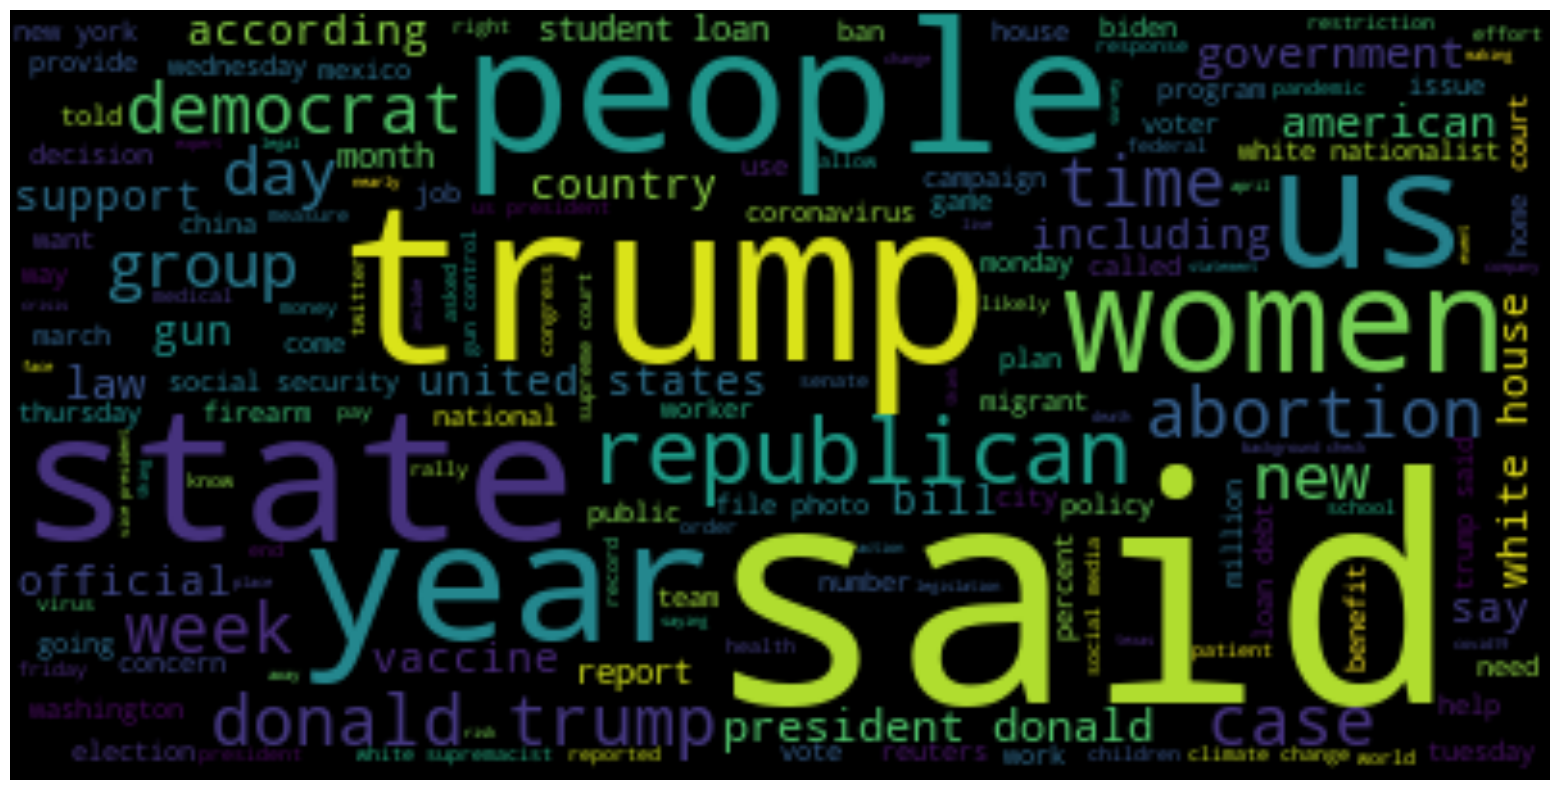

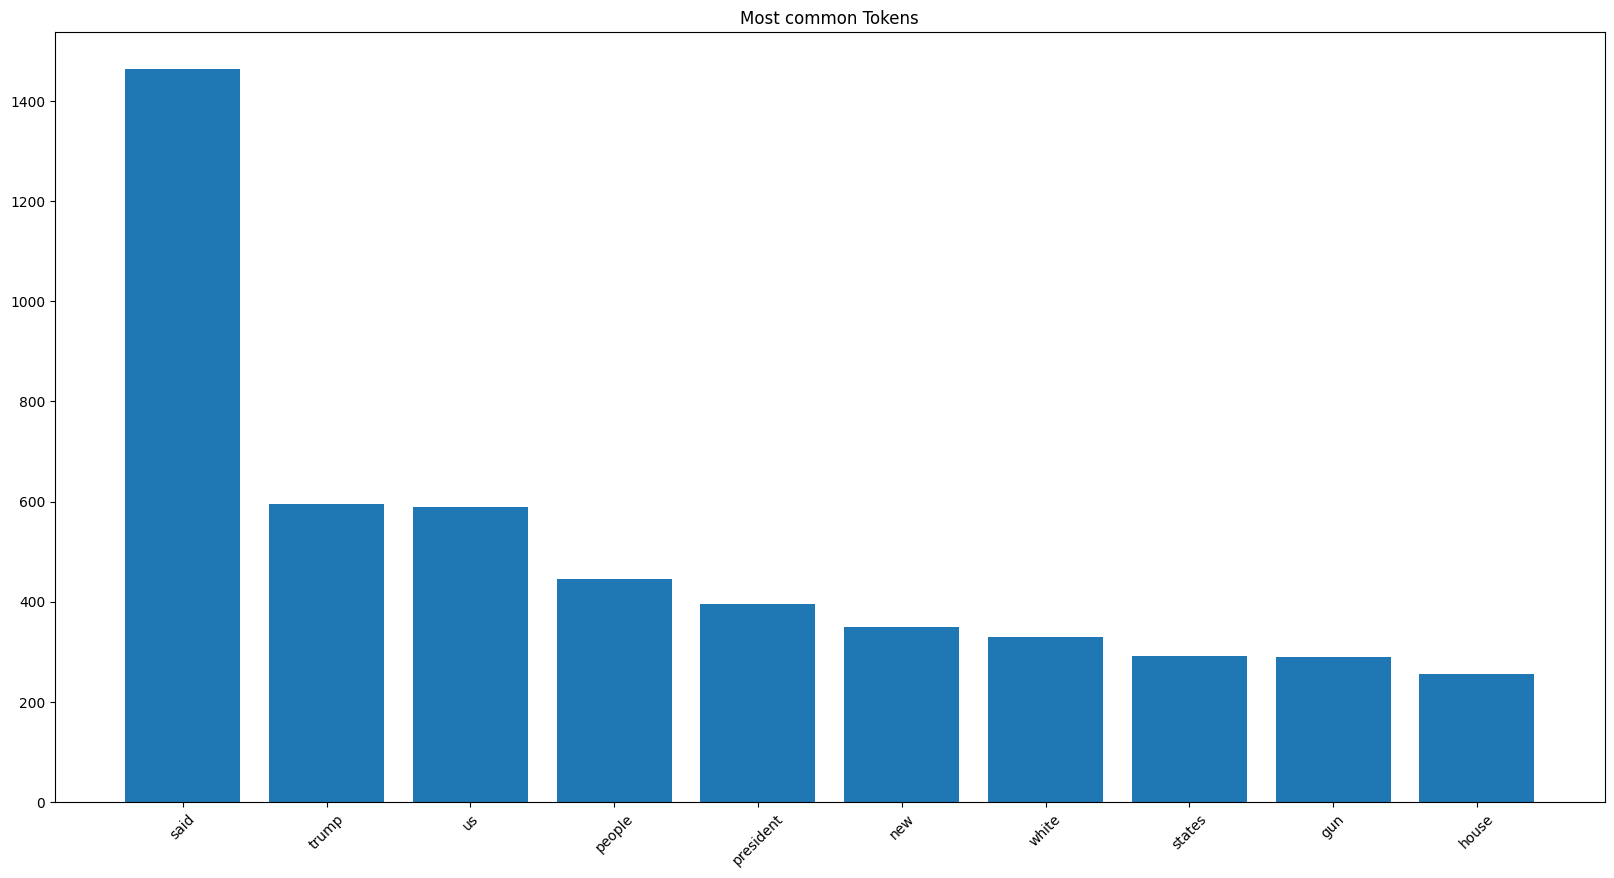

In [23]:
plot_wordcloud(center_docx)
plot_most_common_tokens(center_docx)

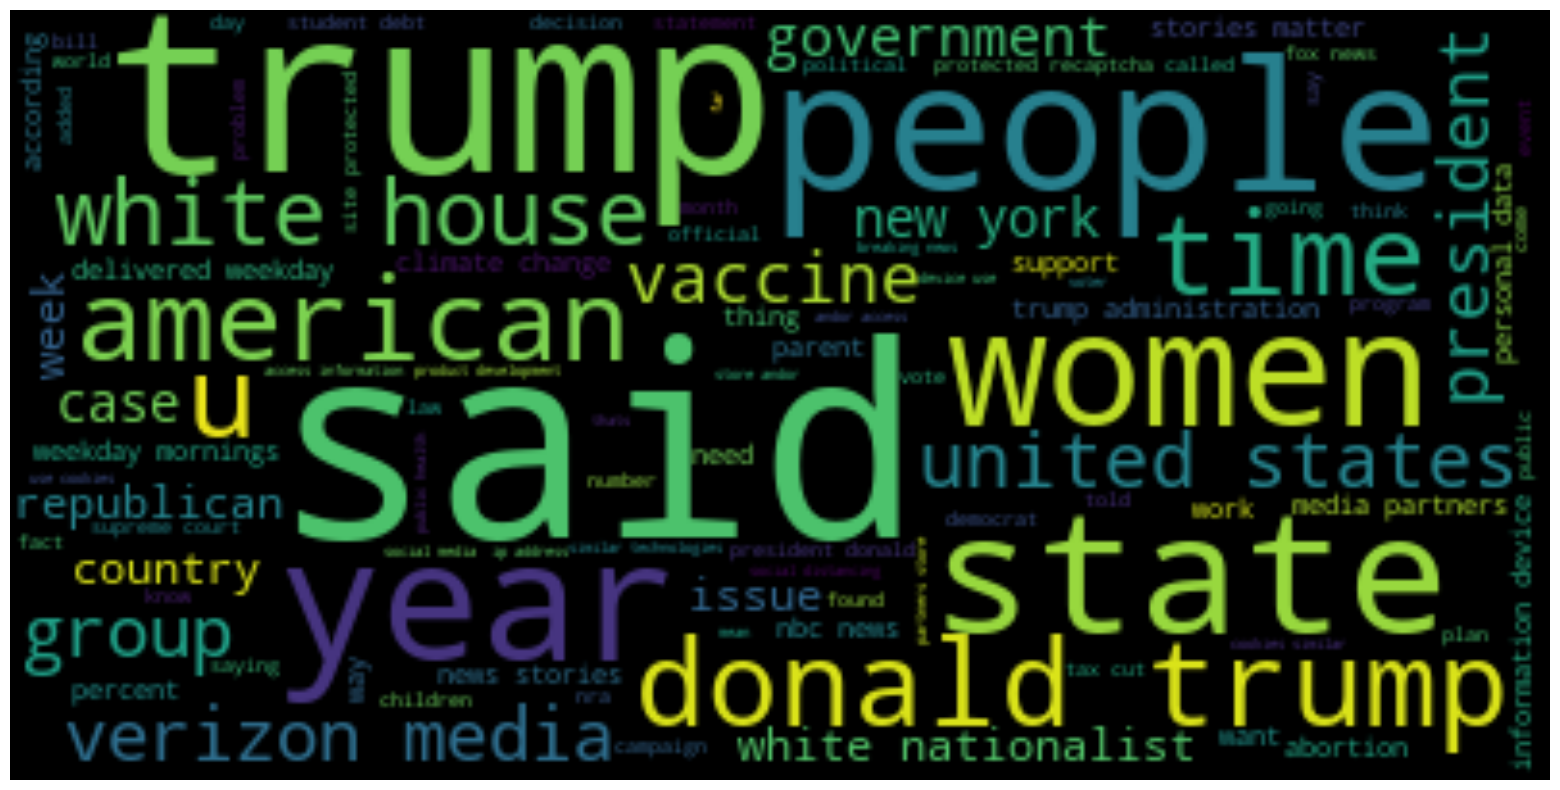

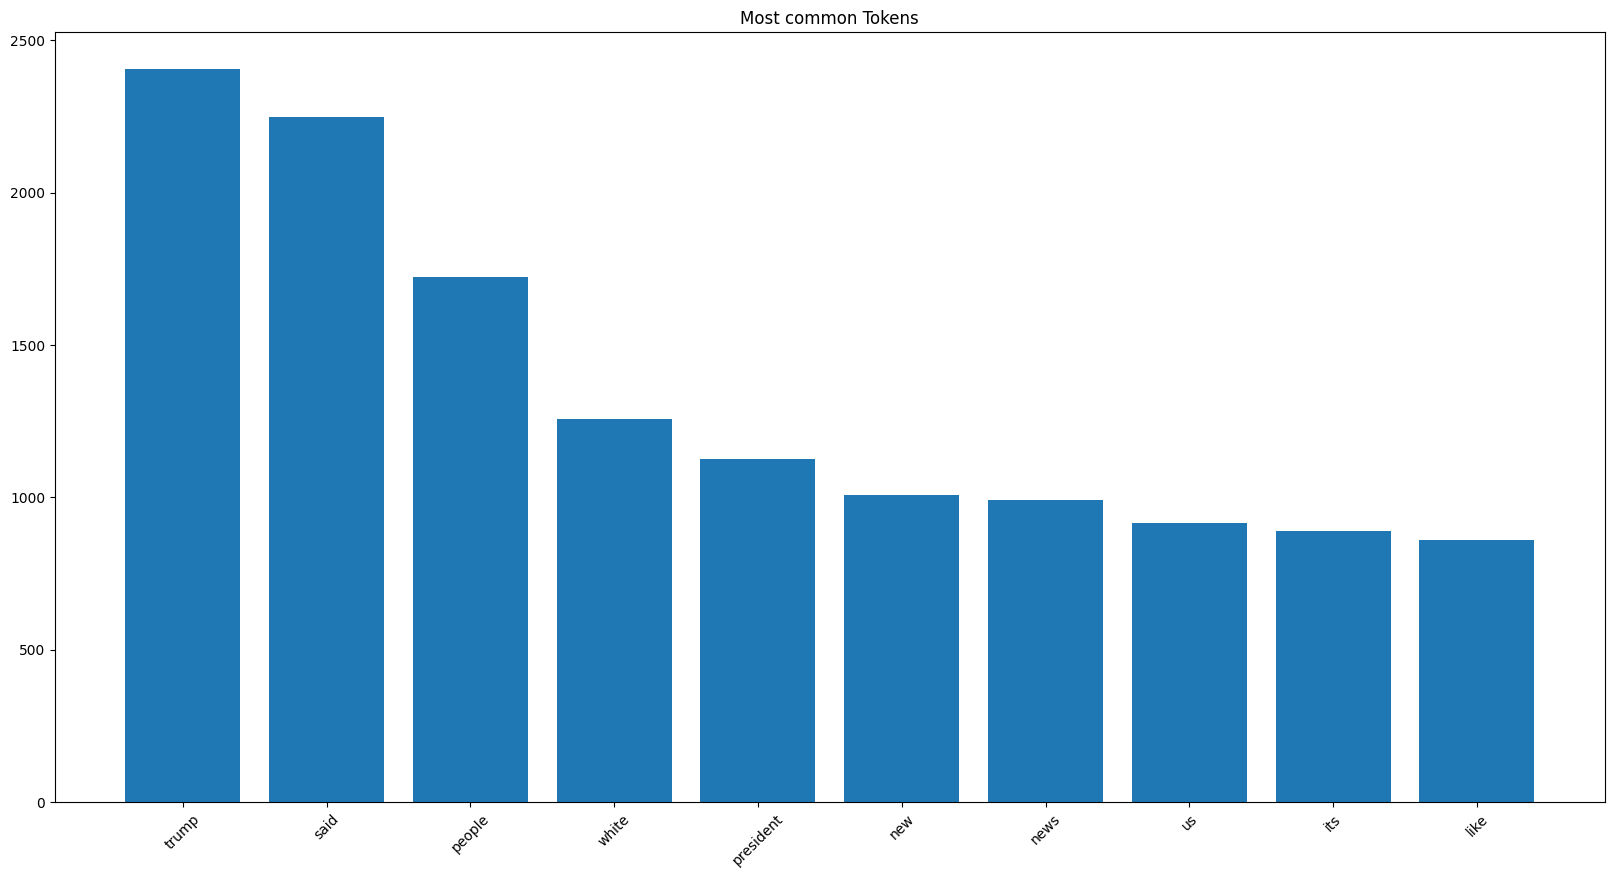

In [24]:
plot_wordcloud(left_docx)
plot_most_common_tokens(left_docx)

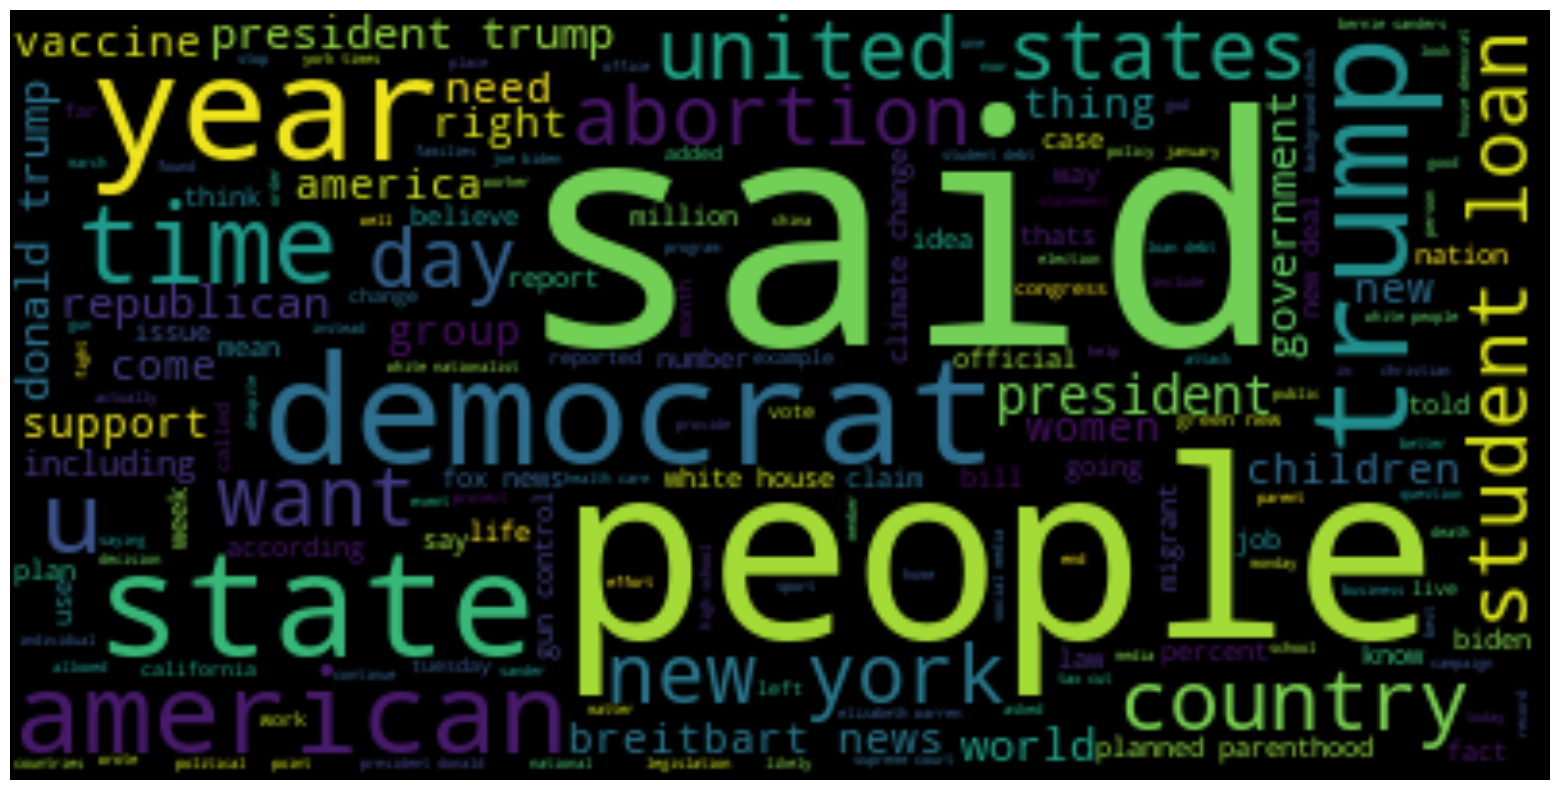

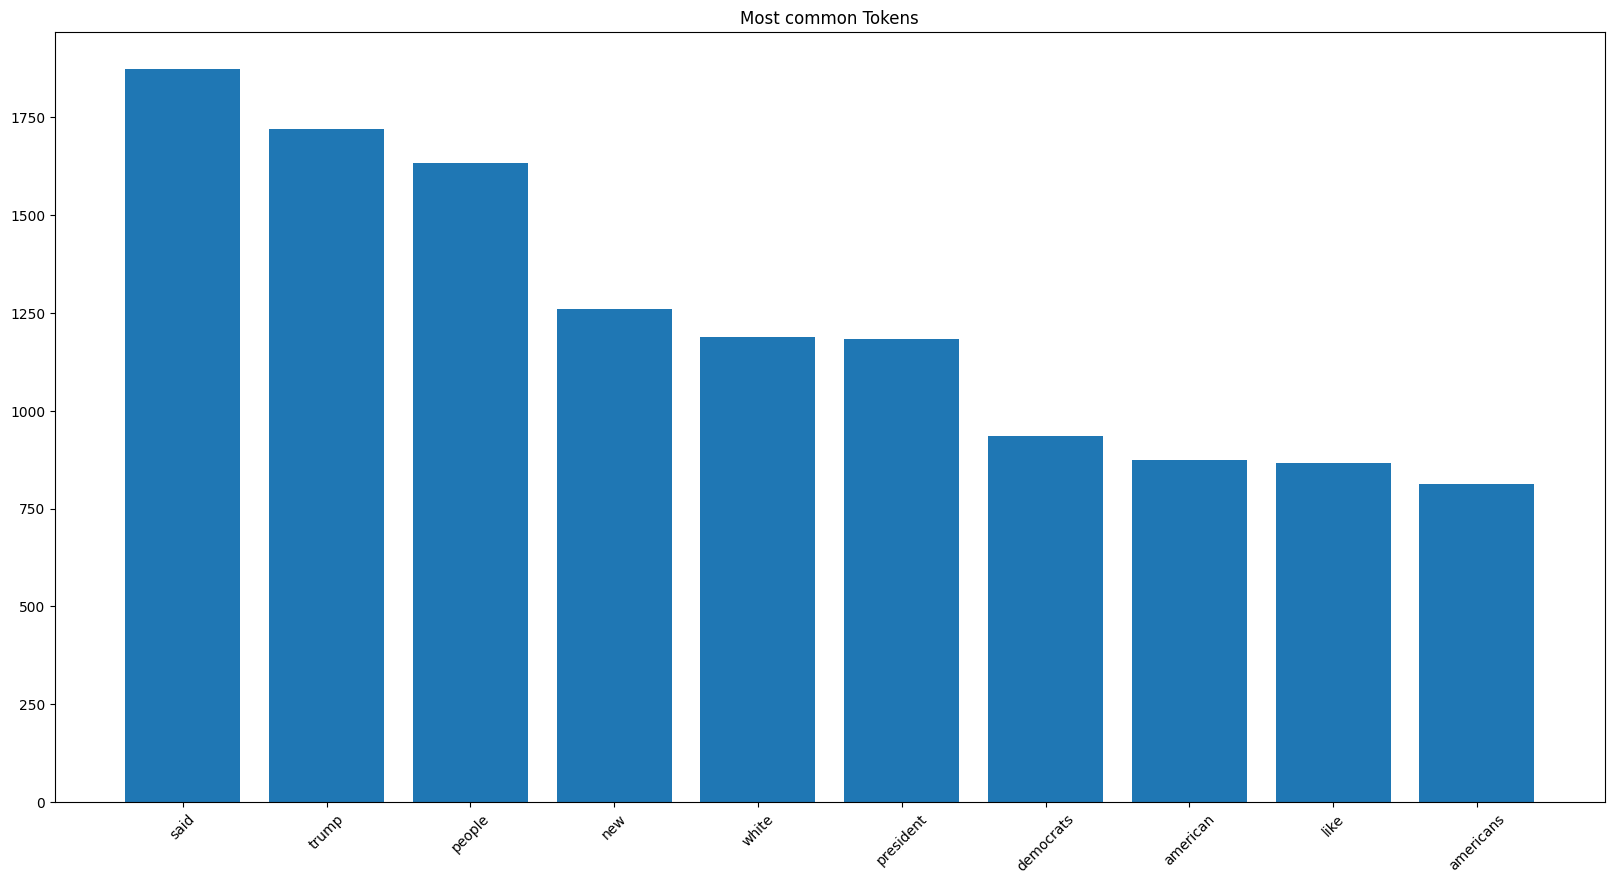

In [25]:
plot_wordcloud(right_docx)
plot_most_common_tokens(right_docx)

# DEEP LEARNING

### TENSORFLOW 
- New package TextVectorizerLayer
- Initially we have to do tokenization, text to sequence and then padding but it can now be done in a single layer

In [26]:
# Features and labels

# label Encoding
label_dict = {v:k for k, v in enumerate(df["type"].unique())}
label_dict

{'center': 0, 'left': 1, 'right': 2}

In [27]:
Xfeatures = df["clean_documents"]
ylabels = df["type"].map(label_dict)

In [28]:
ylabels

0       0
1       1
2       2
3       1
4       2
       ..
1695    2
1696    1
1697    0
1698    2
1699    2
Name: type, Length: 1700, dtype: int64

In [29]:
Xfeatures

0       youtube making clear birtherism platform years...
1       humanitarian crisis driving vulnerable people ...
2       looking united states welfare left stop killin...
3       republican president assumed helping industry ...
4       explosion hispanic population longterm job pro...
                              ...                        
1695    week barstool sports founder dave portnoy rele...
1696    coincidentally republican lawmakers voted larg...
1697    democrats republicans stood applauded illinois...
1698    selfdescribed democratic socialist sen bernie ...
1699    segment colbert bemoaned fact barack obama lon...
Name: clean_documents, Length: 1700, dtype: object

In [30]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.30, random_state=42)

In [31]:
# Feature engineering using KERAS

# keras.layers.TextVectorization??
# Init signature:
# keras.layers.TextVectorization(
#     max_tokens=None,
#     standardize='lower_and_strip_punctuation',
#     split='whitespace',
#     ngrams=None,
#     output_mode='int',
#     output_sequence_length=None,
#     pad_to_max_tokens=False,
#     vocabulary=None,
#     idf_weights=None,
#     sparse=False,
#     ragged=False,
#     **kwargs,
# )

In [32]:
text_vectorizer = keras.layers.TextVectorization(max_tokens=5000,
                                                standardize='lower_and_strip_punctuation',
                                                 split='whitespace',
                                                 ngrams=None,
                                                 output_mode='tf_idf')

In [33]:
# Adapt : Create vectors from the data

text_vectorizer.adapt(x_train, batch_size=512) # it consitis of our training data now

In [34]:
#vocab
vocab = text_vectorizer.get_vocabulary()
print(vocab[:20])

['[UNK]', 'said', 'trump', 'people', 'president', 'white', 'new', 'us', 'like', 'news', 'its', 'states', 'state', 'years', 'house', 'american', 'women', 'americans', 'time', 'media']


In [35]:
# Class Trarget
classes = np.unique(y_train)
classes

array([0, 1, 2], dtype=int64)

In [36]:
## Building Our Model
def create_model(text_vectorizer):
    dl_model = Sequential([
        layers.Input(shape=(1,), dtype='string'),
        text_vectorizer,
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(len(classes), activation="softmax")
    ])
    return dl_model

In [37]:
## Creating the model
model = create_model(text_vectorizer)
## Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 5000)             1         
 torization)                                                     
                                                                 
 dense (Dense)               (None, 128)               640128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 648,580
Trainable params: 648,579
Non-trainable params: 1
_________________________________________________________________


In [38]:
## Compile
model.compile("adam", "sparse_categorical_crossentropy", metrics = ["accuracy"])
## Train
history = model.fit(x_train, y_train, batch_size=256, epochs = 10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 [==============================] - 3s 169ms/step - loss: 4.1209 - accuracy: 0.4227 - val_loss: 1.8998 - val_accuracy: 0.5294
Epoch 2/10
5/5 [==============================] - 0s 80ms/step - loss: 1.0353 - accuracy: 0.6210 - val_loss: 1.2016 - val_accuracy: 0.4882
Epoch 3/10
5/5 [==============================] - 0s 79ms/step - loss: 0.6033 - accuracy: 0.7034 - val_loss: 0.5980 - val_accuracy: 0.7510
Epoch 4/10
5/5 [==============================] - 0s 88ms/step - loss: 0.3571 - accuracy: 0.8706 - val_loss: 0.6099 - val_accuracy: 0.7451
Epoch 5/10
5/5 [==============================] - 0s 86ms/step - loss: 0.2365 - accuracy: 0.9471 - val_loss: 0.4845 - val_accuracy: 0.8275
Epoch 6/10
5/5 [==============================] - 0s 89ms/step - loss: 0.1666 - accuracy: 0.9798 - val_loss: 0.5415 - val_accuracy: 0.8078
Epoch 7/10
5/5 [==============================] - 0s 87ms/step - loss: 0.1294 - accuracy: 0.9866 - val_loss: 0.4595 - val_accuracy: 0.8412
Epoch 8/10
5/5 [==========

In [39]:
## Accuracy
y_pred = model.predict(x_test)

16/16 [==============================] - 0s 8ms/step


In [40]:
score = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 7ms/step - loss: 0.4222 - accuracy: 0.8647


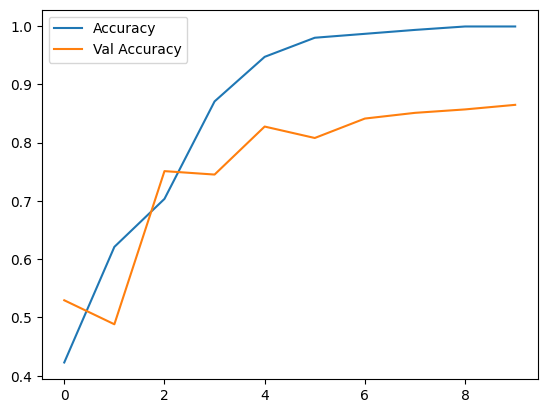

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val Accuracy'])
plt.show()

In [42]:
accuracy_score(y_test, np.argmax(y_pred, axis = 1))

0.8647058823529412

In [43]:
print(classification_report(y_test, np.argmax(y_pred, axis = 1), target_names=label_dict.keys()))

              precision    recall  f1-score   support

      center       0.78      0.74      0.76        94
        left       0.88      0.91      0.89       211
       right       0.89      0.88      0.88       205

    accuracy                           0.86       510
   macro avg       0.85      0.84      0.85       510
weighted avg       0.86      0.86      0.86       510



In [44]:
### Make Prediction {'center': 0, 'left': 1, 'right': 2}
x_test.iloc[23]

'travel ban prevented countrys deadliest terrorist attacks recent years committed rightwing americans immigrants antiimmigrant extremist killed 22 shoppers store el paso white supremacist killed 17 students teachers school parkland florida antisemite killed 11 worshipers synagogue pittsburghcharles kurzman university north carolina chapel hill past decades people killed us extremists countries trump administrations new travel ban list answer zero according data collected department justice records sources immigrants countries constitute 1 terrorism cases united states cases years true original travel bans imposed 2017 were are zero fatalities united states caused extremists countries lists too attempted attack decades new ban begins feb 22 citizens eritrea kyrgyzstan myanmar nigeria sudan tanzania longer able apply immigrant visas white house says countries must satisfy basic security conditions outlined americas lawenforcement intelligence professionals order ban lifted however eviden

In [45]:
y_test.iloc[23] # {'center': 0, 'left': 1, 'right': 2}

1

In [46]:
prediction1 = model.predict(np.array(x_test.iloc[23]).reshape(1,-1))

1/1 [==============================] - 0s 37ms/step


In [47]:
np.argmax(prediction1, axis = 1)

array([1], dtype=int64)

In [48]:
# Example
### ACCORDING TO NEWS.GROUND IT IS SAID TO BE A LEFTIST 
ex1 = "Shanghai hit by COVID protests as anger spreads across China. Protests simmered in Shanghai early on Sunday, as residents in several Chinese cities, many of them angered by a deadly fire in the country's far west, pushed back against heavy COVID-19 curbs nearly three years into the pandemic"

In [49]:
pred1 = model.predict(np.array(ex1).reshape(1,-1))
pred1

1/1 [==============================] - 0s 43ms/step


array([[0.28458378, 0.23033845, 0.48507783]], dtype=float32)

In [50]:
np.argmax(pred1, axis = 1) # OUR MODEL PREDICTED LEFT WHICH IS CORRECT

array([2], dtype=int64)

# Explanation of Model

In [51]:
#!pip install shap

In [52]:
import shap

masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(model, masker = masker, output_names=classes)

d:\Mini Project\emv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
explainer

In [54]:
ex2 = x_test.iloc[23]
shap_values = explainer([ex2])
# Interpret the model with the plot
shap.plots.text(shap_values)

In [55]:
shap_values = explainer([ex1])
# Interpret the model with the plot
shap.plots.text(shap_values)

## Pickle

In [56]:
import pickle

In [57]:
pickle.dump(model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://4b294c86-8025-4efa-8b1d-43f328209187/assets


In [58]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [60]:
model.save('D:\Mini Project\Political Spectrum\model')

INFO:tensorflow:Assets written to: D:\Mini Project\Political Spectrum\model\assets


In [62]:
model = keras.models.load_model('D:\Mini Project\Political Spectrum\model')

In [63]:
pred1 = model.predict(np.array(ex1).reshape(1,-1))
pred1

1/1 [==============================] - 0s 146ms/step


array([[0.28458378, 0.23033845, 0.48507783]], dtype=float32)

In [64]:
np.argmax(pred1, axis = 1) # OUR MODEL PREDICTED LEFT WHICH IS CORRECT

array([2], dtype=int64)